In [1]:
#Lucro por quilo de cada tipo de alimento

lucro_por_tipo = {
    "Tomate" : 2.00,
    "Alface" : 1.50
}

In [2]:
demanda_por_tipo = {
    "Tomate" :{"agua" : 3.00 , "espaço" : 2},
    "Alface" :{"agua" : 2.00 , "espaço" : 3}
}

In [3]:
disponibilidade_recursos = {
    "agua": 5900,
    "espaço": 5400
}

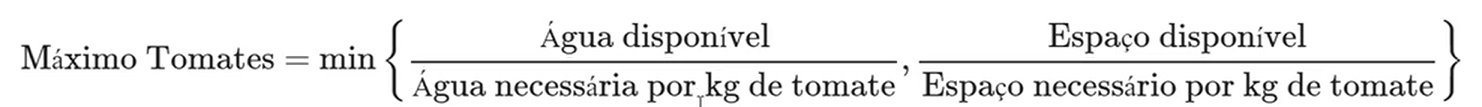

In [4]:
max_tomate = min(
    disponibilidade_recursos['agua'] / demanda_por_tipo['Tomate']['agua'],
    disponibilidade_recursos['espaço'] / demanda_por_tipo['Tomate']['espaço']
)

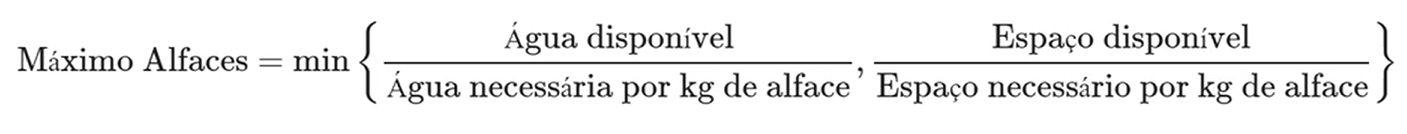

In [5]:
max_alface = min(
    disponibilidade_recursos['agua'] / demanda_por_tipo['Alface']['agua'],
    disponibilidade_recursos['espaço'] / demanda_por_tipo['Alface']['espaço']
)

In [6]:
max_tomate

1966.6666666666667

In [7]:
max_alface

1800.0

In [8]:
def calcular_lucro_e_viabilidade(qtd_tomate,qtd_alface):
    uso_agua = qtd_alface * demanda_por_tipo["Alface"]["agua"] + qtd_tomate * demanda_por_tipo["Tomate"]["agua"]
    uso_espaço = qtd_alface * demanda_por_tipo["Alface"]["espaço"] + qtd_tomate * demanda_por_tipo["Tomate"]["espaço"]
    
    restricoes = {"agua" : uso_agua, "espaço" : uso_espaço, "diversificação" : (qtd_alface, qtd_tomate)}
    
    viola_restricoes = (
        uso_agua > disponibilidade_recursos["agua"] or 
        uso_espaço > disponibilidade_recursos["espaço"] or
        qtd_tomate < 10/100*qtd_alface 
    )
    
    lucro = qtd_tomate*lucro_por_tipo["Tomate"] + qtd_alface*lucro_por_tipo["Alface"]
    
    return lucro, viola_restricoes, restricoes

In [9]:
calcular_lucro_e_viabilidade(16,0)

(32.0, False, {'agua': 48.0, 'espaço': 32, 'diversificação': (0, 16)})

In [10]:
calcular_lucro_e_viabilidade(10,5)

(27.5, False, {'agua': 40.0, 'espaço': 35, 'diversificação': (5, 10)})

In [11]:
lista_solucoes = []

for qtd_tomate in range(0, int(max_tomate)+1, 100):
    for qtd_alface in range(0, int(max_alface)+1, 100):
        lucro, viola_restricoes, restricoes = calcular_lucro_e_viabilidade(qtd_tomate,qtd_alface)
        lista_solucoes.append([qtd_tomate, qtd_alface, lucro, viola_restricoes, restricoes])
        
        if not viola_restricoes:
            print(f"Tomate : {qtd_tomate} kg, Alface: {qtd_alface} kg, Lucro: {lucro:.2f}")

Tomate : 0 kg, Alface: 0 kg, Lucro: 0.00
Tomate : 100 kg, Alface: 0 kg, Lucro: 200.00
Tomate : 100 kg, Alface: 100 kg, Lucro: 350.00
Tomate : 100 kg, Alface: 200 kg, Lucro: 500.00
Tomate : 100 kg, Alface: 300 kg, Lucro: 650.00
Tomate : 100 kg, Alface: 400 kg, Lucro: 800.00
Tomate : 100 kg, Alface: 500 kg, Lucro: 950.00
Tomate : 100 kg, Alface: 600 kg, Lucro: 1100.00
Tomate : 100 kg, Alface: 700 kg, Lucro: 1250.00
Tomate : 100 kg, Alface: 800 kg, Lucro: 1400.00
Tomate : 100 kg, Alface: 900 kg, Lucro: 1550.00
Tomate : 100 kg, Alface: 1000 kg, Lucro: 1700.00
Tomate : 200 kg, Alface: 0 kg, Lucro: 400.00
Tomate : 200 kg, Alface: 100 kg, Lucro: 550.00
Tomate : 200 kg, Alface: 200 kg, Lucro: 700.00
Tomate : 200 kg, Alface: 300 kg, Lucro: 850.00
Tomate : 200 kg, Alface: 400 kg, Lucro: 1000.00
Tomate : 200 kg, Alface: 500 kg, Lucro: 1150.00
Tomate : 200 kg, Alface: 600 kg, Lucro: 1300.00
Tomate : 200 kg, Alface: 700 kg, Lucro: 1450.00
Tomate : 200 kg, Alface: 800 kg, Lucro: 1600.00
Tomate : 200

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(
    lista_solucoes,
    columns = ["qtd_tomate", "qtd_alface", "lucro", "viola_restricoes", "restrições"]
)

In [14]:
df.head()

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restrições
0,0,0,0.0,False,"{'agua': 0.0, 'espaço': 0, 'diversificação': (..."
1,0,100,150.0,True,"{'agua': 200.0, 'espaço': 300, 'diversificação..."
2,0,200,300.0,True,"{'agua': 400.0, 'espaço': 600, 'diversificação..."
3,0,300,450.0,True,"{'agua': 600.0, 'espaço': 900, 'diversificação..."
4,0,400,600.0,True,"{'agua': 800.0, 'espaço': 1200, 'diversificaçã..."


In [15]:
df.query("viola_restricoes==False")


,qtd_tomate,qtd_alface,lucro,viola_restricoes,restrições
0,0,0,0.0,False,"{'agua': 0.0, 'espaço': 0, 'diversificação': (..."
19,100,0,200.0,False,"{'agua': 300.0, 'espaço': 200, 'diversificação..."
20,100,100,350.0,False,"{'agua': 500.0, 'espaço': 500, 'diversificação..."
21,100,200,500.0,False,"{'agua': 700.0, 'espaço': 800, 'diversificação..."
22,100,300,650.0,False,"{'agua': 900.0, 'espaço': 1100, 'diversificaçã..."
...,...,...,...,...,...
342,1800,0,3600.0,False,"{'agua': 5400.0, 'espaço': 3600, 'diversificaç..."
343,1800,100,3750.0,False,"{'agua': 5600.0, 'espaço': 3900, 'diversificaç..."
344,1800,200,3900.0,False,"{'agua': 5800.0, 'espaço': 4200, 'diversificaç..."
361,1900,0,3800.0,False,"{'agua': 5700.0, 'espaço': 3800, 'diversificaç..."


In [16]:
row_index = df.query("viola_restricoes==False")["lucro"].idxmax()

In [17]:
df.loc[row_index]

qtd_tomate                                                       1500
qtd_alface                                                        700
lucro                                                          4050.0
viola_restricoes                                                False
restrições          {'agua': 5900.0, 'espaço': 5100, 'diversificaç...
Name: 292, dtype: object

In [18]:
# lista_solucoes = []

# for qtd_tomate in range(0, int(max_tomate)+1, 1):
#     for qtd_alface in range(0, int(max_alface)+1, 1):
#         lucro, viola_restricoes, restricoes = calcular_lucro_e_viabilidade(qtd_tomate,qtd_alface)
#         lista_solucoes.append([qtd_tomate, qtd_alface, lucro, viola_restricoes, restricoes])
        
#         if not viola_restricoes:
#             print(f"Tomate : {qtd_tomate} kg, Alface: {qtd_alface} kg, Lucro: {lucro:.2f}")

In [19]:
# df = pd.DataFrame(
#     lista_solucoes,
#     columns = ["qtd_tomate", "qtd_alface", "lucro", "viola_restricoes", "restrições"]
# )

In [20]:
# row_index = df.query("viola_restricoes==False")["lucro"].idxmax()

In [21]:
# df.loc[row_index]

### Solução Gráfica

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
x_max = 4000
y_max = 4000

In [24]:
x = np.linspace(0, x_max, 400)
y = np.linspace(0, y_max, 400)

In [25]:
y1 = (6000 - 3*x) /2
y2 = (5500 - 2*x) /3
y3 = 10*x

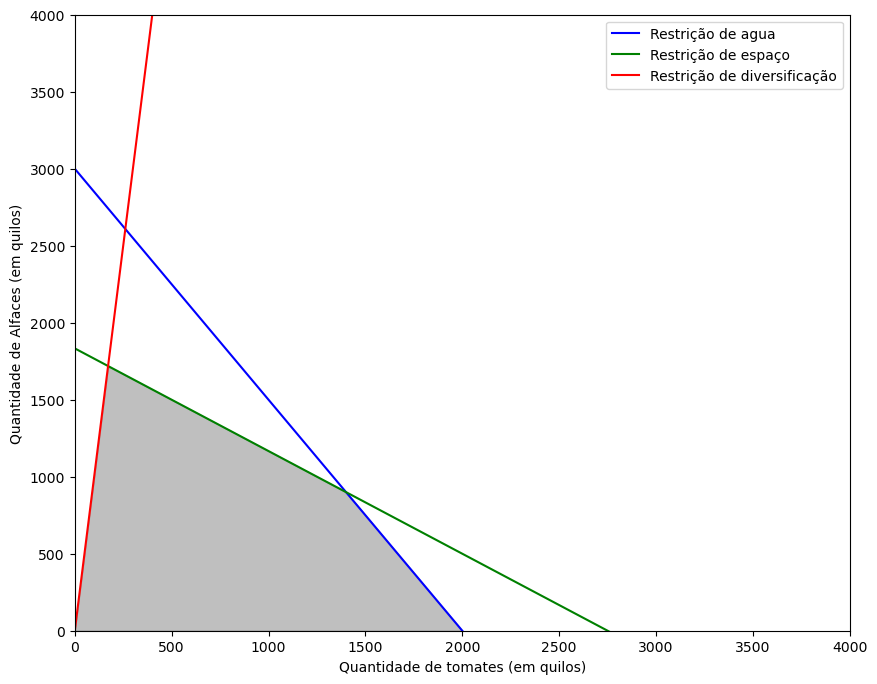

In [26]:
plt.figure(figsize = (10,8))

plt.fill_between(x,0, np.minimum(np.minimum(y1,y2),y3), where = (y1 >= 0) & (y2 >= 0) & (y3 >= 0), color = 'gray', alpha = 0.5)

plt.plot(x,y1,color = 'b', label = 'Restrição de agua')
plt.plot(x,y2,color = 'g', label = 'Restrição de espaço')
plt.plot(x,y3,color = 'r', label = 'Restrição de diversificação')

plt.xlim(0,x_max)
plt.ylim(0,y_max)
plt.xlabel("Quantidade de tomates (em quilos)")
plt.ylabel("Quantidade de Alfaces (em quilos)")


plt.legend()
plt.show()



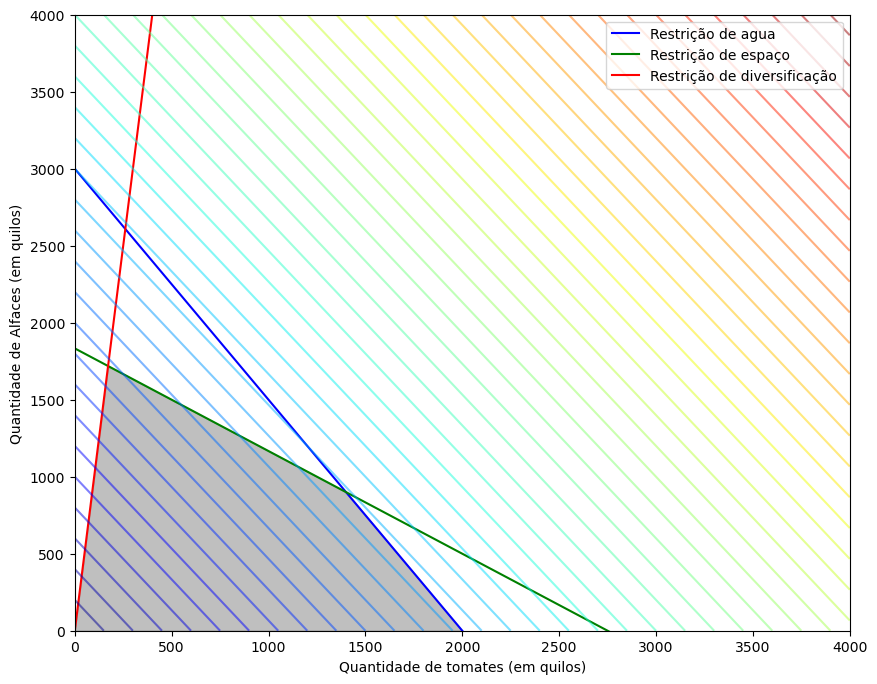

In [27]:
plt.figure(figsize = (10,8))

plt.fill_between(x,0, np.minimum(np.minimum(y1,y2),y3), where = (y1 >= 0) & (y2 >= 0) & (y3 >= 0), color = 'gray', alpha = 0.5)

plt.plot(x,y1,color = 'b', label = 'Restrição de agua')
plt.plot(x,y2,color = 'g', label = 'Restrição de espaço')
plt.plot(x,y3,color = 'r', label = 'Restrição de diversificação')

X,Y = np.meshgrid(x,y)
Z = 2*X + 1.5*Y

plt.contour(X,Y,Z, 50, alpha = 0.5, cmap = 'jet')

plt.xlim(0,x_max)
plt.ylim(0,y_max)
plt.xlabel("Quantidade de tomates (em quilos)")
plt.ylabel("Quantidade de Alfaces (em quilos)")


plt.legend()
plt.show()



# Multiplas soluções

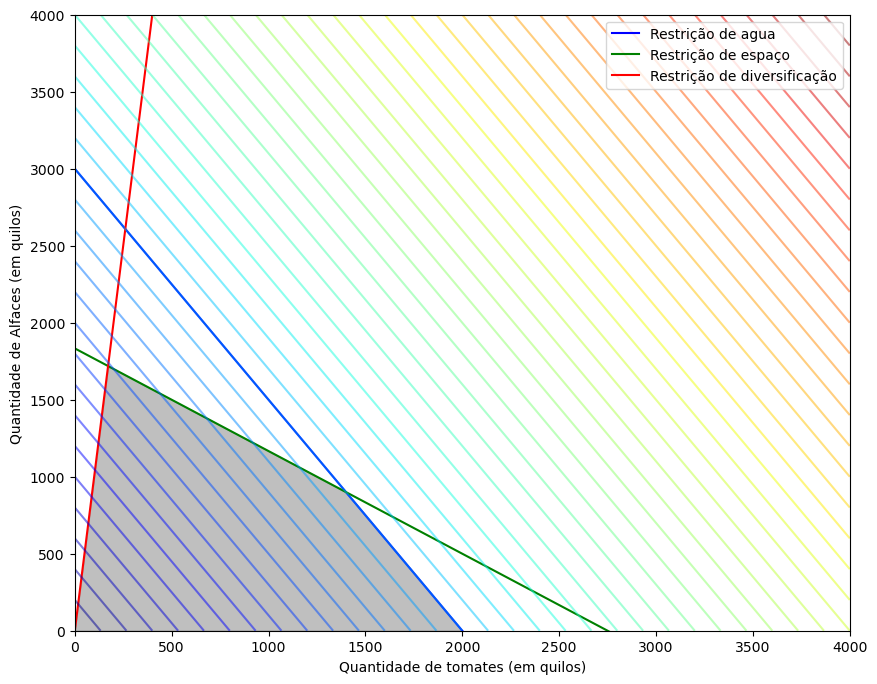

In [28]:
plt.figure(figsize = (10,8))

plt.fill_between(x,0, np.minimum(np.minimum(y1,y2),y3), where = (y1 >= 0) & (y2 >= 0) & (y3 >= 0), color = 'gray', alpha = 0.5)

plt.plot(x,y1,color = 'b', label = 'Restrição de agua')
plt.plot(x,y2,color = 'g', label = 'Restrição de espaço')
plt.plot(x,y3,color = 'r', label = 'Restrição de diversificação')

X,Y = np.meshgrid(x,y)
Z = 3*X + 2*Y

plt.contour(X,Y,Z, 50, alpha = 0.5, cmap = 'jet')

plt.xlim(0,x_max)
plt.ylim(0,y_max)
plt.xlabel("Quantidade de tomates (em quilos)")
plt.ylabel("Quantidade de Alfaces (em quilos)")


plt.legend()
plt.show()



# Solução ilimitada

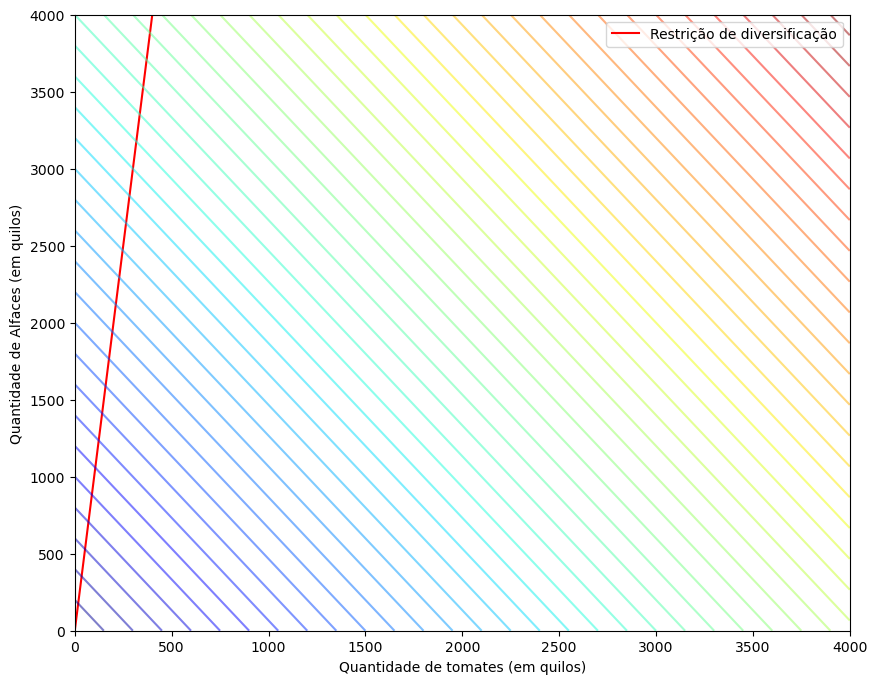

In [29]:
plt.figure(figsize = (10,8))


plt.plot(x,y3,color = 'r', label = 'Restrição de diversificação')

X,Y = np.meshgrid(x,y)
Z = 2*X + 1.5*Y

plt.contour(X,Y,Z, 50, alpha = 0.5, cmap = 'jet')

plt.xlim(0,x_max)
plt.ylim(0,y_max)
plt.xlabel("Quantidade de tomates (em quilos)")
plt.ylabel("Quantidade de Alfaces (em quilos)")


plt.legend()
plt.show()



# Sem solução (Inviabilidade)

$$ x_{\text{Tomate}} + x_{\text{Alface}} \geq 3000 $$


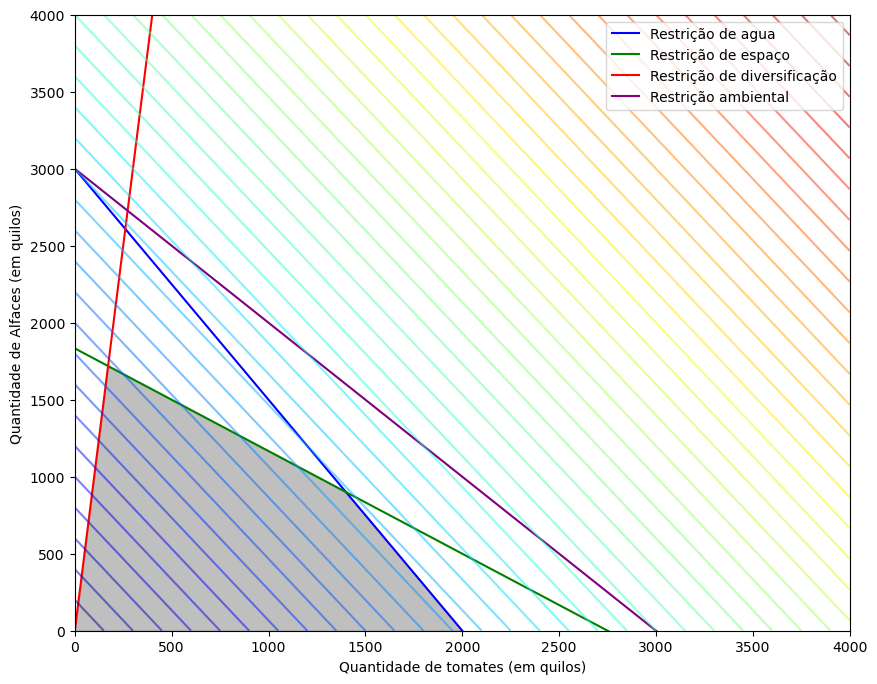

In [30]:
plt.figure(figsize = (10,8))

plt.fill_between(x,0, np.minimum(np.minimum(y1,y2),y3), where = (y1 >= 0) & (y2 >= 0) & (y3 >= 0), color = 'gray', alpha = 0.5)

y4 = 3000 - x

plt.plot(x,y1,color = 'b', label = 'Restrição de agua')
plt.plot(x,y2,color = 'g', label = 'Restrição de espaço')
plt.plot(x,y3,color = 'r', label = 'Restrição de diversificação')
plt.plot(x,y4,color = 'purple', label = 'Restrição ambiental')

X,Y = np.meshgrid(x,y)
Z = 2*X + 1.5*Y

plt.contour(X,Y,Z, 50, alpha = 0.5, cmap = 'jet')

plt.xlim(0,x_max)
plt.ylim(0,y_max)
plt.xlabel("Quantidade de tomates (em quilos)")
plt.ylabel("Quantidade de Alfaces (em quilos)")


plt.legend()
plt.show()



# instalando outras bibliotecas

In [31]:
!pip install pyomo


In [32]:
!apt-get install -y -qq glpk-utils


'apt-get' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [33]:
import pyomo.environ as pyo

In [34]:
modelo = pyo.ConcreteModel()

In [35]:
modelo.x_tomate = pyo.Var(within = pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(within = pyo.NonNegativeReals)

In [36]:
modelo.lucro = pyo.Objective(expr=2*modelo.x_tomate + 1.5*modelo.x_alface, sense = pyo.maximize)

In [37]:
modelo.restricao_agua = pyo.Constraint(expr = 3*modelo.x_tomate + 2*modelo.x_alface <= 6000)
modelo.restricao_espaco = pyo.Constraint(expr = 2*modelo.x_tomate + 3*modelo.x_alface <= 5500)
modelo.restricao_diversificacao = pyo.Constraint(expr = modelo.x_tomate >= 0.1*modelo.x_alface)

In [38]:
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee = True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\Filip\AppData\Local\Temp\tmplixcsqcc.glpk.raw --wglp C:\Users\Filip\AppData\Local\Temp\tmpn1e6xpc9.glpk.glp
 --cpxlp C:\Users\Filip\AppData\Local\Temp\tmptssrscg5.pyomo.lp
Reading problem data from 'C:\Users\Filip\AppData\Local\Temp\tmptssrscg5.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to 'C:\Users\Filip\AppData\Local\Temp\tmpn1e6xpc9.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   4.150000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (32392 bytes)
Writing basic 

In [39]:
modelo.x_tomate.display()
modelo.x_alface.display()

x_tomate : Size=1, Index=None
    Key  : Lower : Value  : Upper : Fixed : Stale : Domain
    None :     0 : 1400.0 :  None : False : False : NonNegativeReals
x_alface : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 : 900.0 :  None : False : False : NonNegativeReals


In [40]:
print(f'Quantidade de tomates: {pyo.value(modelo.x_tomate)} kg')

Quantidade de tomates: 1400.0 kg


In [41]:
print(f"Quantidade de alfaces: {pyo.value(modelo.x_alface)} kg")

Quantidade de alfaces: 900.0 kg


In [42]:
print(f"Lucro total: R$ {pyo.value(modelo.lucro):.2f}")

Lucro total: R$ 4150.00


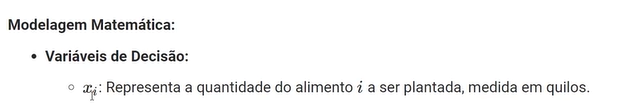

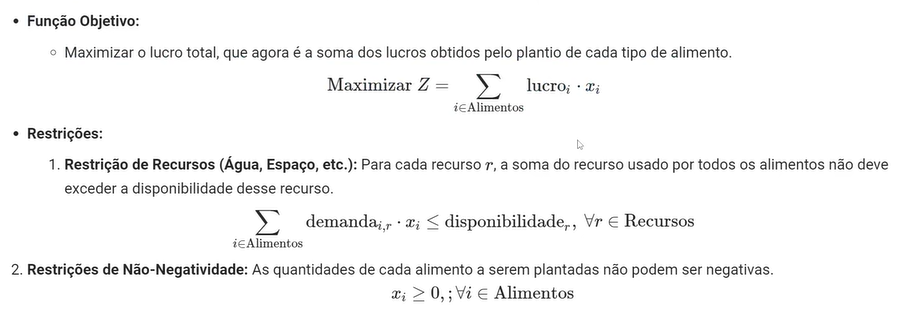

In [43]:
alimentos = ["Tomate", "Alface", "Cenoura", "Batata"]

In [44]:
recursos = ["agua", "espaço"]

In [45]:
lucro_por_alimento = {"Tomate" : 2.00, "Alface" : 1.50, "Cenoura" : 1.80, "Batata" : 1.20}

In [46]:
demanda_por_alimento = {
    "Tomate" : {"agua" : 3.00, "espaço" : 2},
    "Alface" : {"agua" : 2.00, "espaço" : 1},
    "Cenoura" : {"agua" : 4.00, "espaço" : 3},
    "Batata" : {"agua" : 5.00, "espaço" : 2.5}
}

In [47]:
disponibilidade_recursos = {"agua" : 20000, "espaço" : 10000}

In [48]:
modelo = pyo.ConcreteModel()

In [49]:
modelo.x = pyo.Var(alimentos, within = pyo.NonNegativeReals)

In [50]:
modelo.lucro = pyo.Objective(expr = sum(lucro_por_alimento[i]*modelo.x[i] for i in alimentos), sense = pyo.maximize)

In [51]:
# Restrições
for r in recursos:
    modelo.add_component(f'restricao_{r}',
                         pyo.Constraint(expr=sum(demanda_por_alimento[i][r] * modelo.x[i] for i in alimentos) <= disponibilidade_recursos[r])) 


In [52]:
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee = True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\Filip\AppData\Local\Temp\tmpmjq58_gn.glpk.raw --wglp C:\Users\Filip\AppData\Local\Temp\tmpv394h65p.glpk.glp
 --cpxlp C:\Users\Filip\AppData\Local\Temp\tmpqas5lzbs.pyomo.lp
Reading problem data from 'C:\Users\Filip\AppData\Local\Temp\tmpqas5lzbs.pyomo.lp'...
2 rows, 4 columns, 8 non-zeros
31 lines were read
Writing problem data to 'C:\Users\Filip\AppData\Local\Temp\tmpv394h65p.glpk.glp'...
23 lines were written
GLPK Simplex Optimizer, v4.65
2 rows, 4 columns, 8 non-zeros
Preprocessing...
2 rows, 4 columns, 8 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+00  ratio =  5.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (4)
*     3: obj =   1.500000000e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (32380 bytes)
Writing basic 

In [53]:
for alimento in alimentos:
    print(f"Produção de : {alimento} : {pyo.value(modelo.x[alimento])} kg")

Produção de : Tomate : 0.0 kg
Produção de : Alface : 10000.0 kg
Produção de : Cenoura : 0.0 kg
Produção de : Batata : 0.0 kg


In [54]:
print(f"Lucro : R$ {pyo.value(modelo.lucro):.2f}")

Lucro : R$ 15000.00


In [55]:
# # Com uma restrição a mais

# import pyomo.environ as pyo

# # Dados do problema
# alimentos = ['Tomate', 'Alface', 'Cenoura', 'Batata']
# recursos = ['agua', 'espaco']

# lucro_por_alimento = {'Tomate': 2.00, 'Alface': 1.50, 'Cenoura': 1.80, 'Batata': 1.20}
# demanda_por_alimento = {
#     'Tomate': {'agua': 3, 'espaco': 2},
#     'Alface': {'agua': 2, 'espaco': 1},
#     'Cenoura': {'agua': 4, 'espaco': 3},
#     'Batata': {'agua': 5, 'espaco': 2.5}
# }
# disponibilidade_recursos = {'agua': 20000, 'espaco': 10000}

# maximo_producao = 1000

# # Modelo
# modelo = pyo.ConcreteModel()

# # Variáveis de decisão
# modelo.x = pyo.Var(alimentos, domain=pyo.NonNegativeReals)

# # Função objetivo
# modelo.lucro = pyo.Objective(expr=sum(lucro_por_alimento[i] * modelo.x[i] for i in alimentos), sense=pyo.maximize)

# # Restrições
# for r in recursos:
#     modelo.add_component(f'restricao_{r}',
#                          pyo.Constraint(expr=sum(demanda_por_alimento[i][r] * modelo.x[i] for i in alimentos) <= disponibilidade_recursos[r]))

# modelo.add_component(f'restricao_producao', pyo.Constraint(expr=sum(modelo.x[i] for i in alimentos) == maximo_producao ))

# # Resolver o modelo
# solver = pyo.SolverFactory('glpk')
# resultado = solver.solve(modelo, tee=True)

# # Imprimir resultados
# for alimento in alimentos:
#     print(f"Produção de {alimento}: {pyo.value(modelo.x[alimento])} kg")
# print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")


# Análise de sensibilidade

In [56]:
modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

modelo.lucro = pyo.Objective(expr=2*modelo.x_tomate + 1.5*modelo.x_alface, sense=pyo.maximize)

modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate + 2*modelo.x_alface <= 5900)
modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate + 3*modelo.x_alface <= 5400)
modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= 0.1*modelo.x_alface)

solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)


'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
(type=<class 'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown
with a new Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\Filip\AppData\Local\Temp\tmpdld8m41e.glpk.raw --wglp C:\Users\Filip\AppData\Local\Temp\tmpuxj8iy6b.glpk.glp
 --cpxlp C:\Users\Filip\AppData\Local\Temp\tmp1mydolba.pyomo.lp
Reading problem data from 'C:\Users\Filip\AppData\Local\Temp\tmp1mydolba.pyomo.lp'...
4 rows, 6 columns, 10 non-zeros
39 lines were read
Writing problem data to 'C:\User

In [57]:
agua_folga = modelo.restricao_agua.slack()

In [58]:
agua_folga

0.0

In [59]:
espaco_folga = modelo.restricao_espaco.slack()

In [60]:
espaco_folga

0.0

In [61]:
diversificacao_folga = modelo.restricao_diversificacao.slack()

In [62]:
diversificacao_folga

1292.0

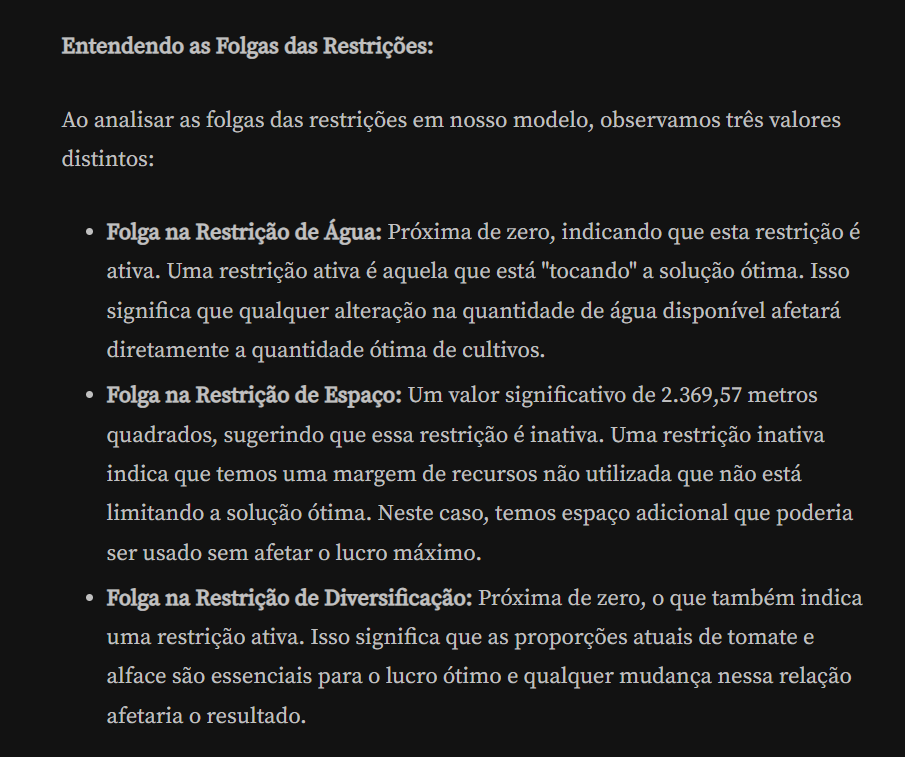

In [63]:
def criar_modelo(coef_tomate):
    modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
    modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

    modelo.lucro = pyo.Objective(expr=coef_tomate*modelo.x_tomate + 1.5*modelo.x_alface, sense=pyo.maximize)

    modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate + 2*modelo.x_alface <= 5900)
    modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate + 3*modelo.x_alface <= 5400)
    modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= 0.1*modelo.x_alface)

    solver = pyo.SolverFactory('glpk')
    resultado = solver.solve(modelo, tee=True)

    return modelo


In [64]:
solver = pyo.SolverFactory('glpk')

In [65]:
coeficiente_tomate = np.linspace(1.5,2.5,12)

In [66]:
lucros_otimos = []
quantidades_tomate = []
quantidades_alface = []

In [67]:
for coef_tomate in coeficiente_tomate:
    modelo = criar_modelo(coef_tomate)
    resultado = solver.solve(modelo, tee = True)
    
    lucros_otimos.append(pyo.value(modelo.lucro))
    quantidades_tomate.append(pyo.value(modelo.x_tomate))
    quantidades_alface.append(pyo.value(modelo.x_alface))

'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
(type=<class 'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown
with a new Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoi

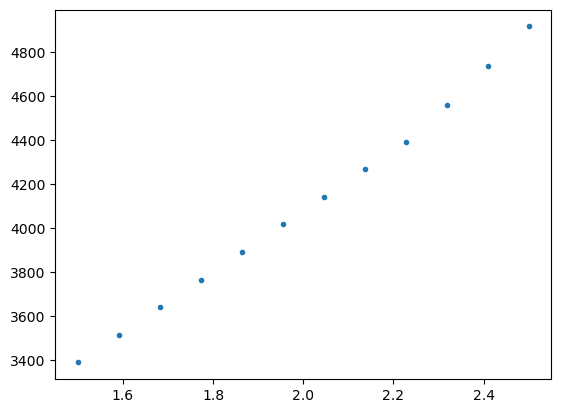

In [68]:
plt.plot(coeficiente_tomate,lucros_otimos,'.')

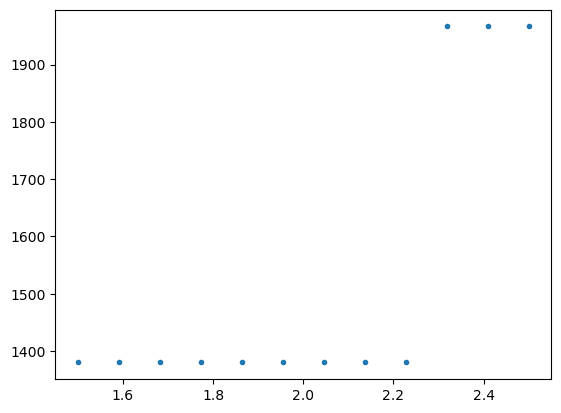

In [69]:
plt.plot(coeficiente_tomate,quantidades_tomate, '.')

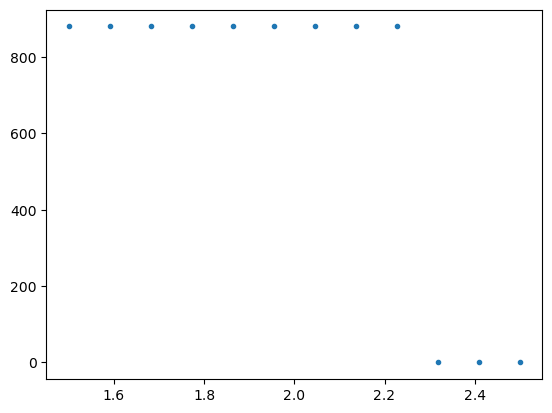

In [70]:
plt.plot(coeficiente_tomate,quantidades_alface, '.')

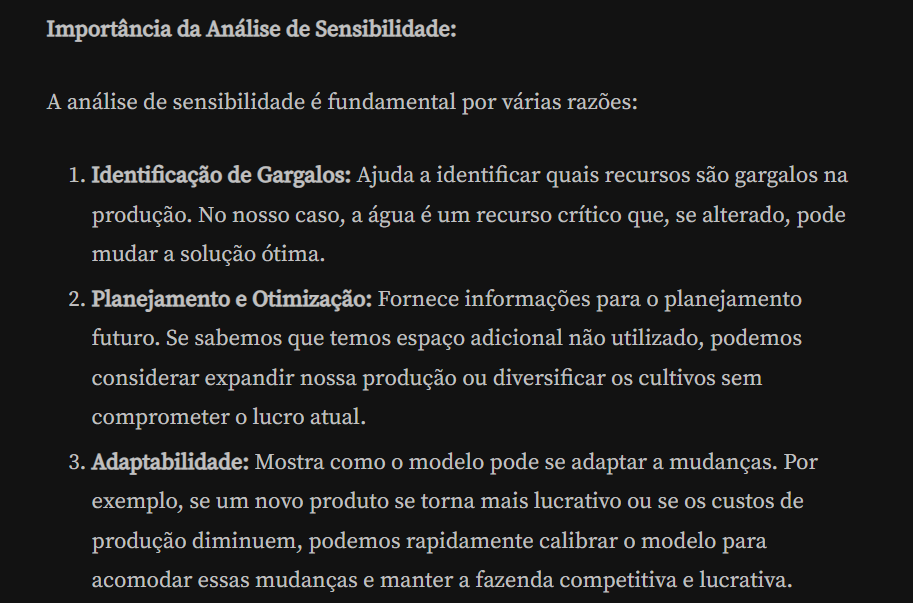

# Modelo para usar

In [ ]:
# import pyomo.environ as pyo

# # Criando um modelo concreto
# modelo = pyo.ConcreteModel()

# # Definindo as variáveis de decisão
# modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
# modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

# # Definindo a função objetivo
# modelo.lucro = pyo.Objective(expr=<INSIRA A FUNÇÃO OBJETIVO>, sense=pyo.maximize)

# # Adicionando as restrições
# modelo.restricao_agua = pyo.Constraint(expr= <INSIRA A RESTRICAO>)
# modelo.restricao_espaco = pyo.Constraint(expr=<INSIRA A RESTRICAO>)
# modelo.restricao_diversificacao = pyo.Constraint(expr=<INSIRA A RESTRICAO>)

# solver = pyo.SolverFactory('glpk')
# resultado = solver.solve(modelo, tee=True)

# # Exibindo as folgas das restrições
# agua_folga = <INSIRA O CODIGO PARA OBTER A FOLGA>
# espaco_folga = <INSIRA O CODIGO PARA OBTER A FOLGA>
# diversificacao_folga = <INSIRA O CODIGO PARA OBTER A FOLGA>

# print(f"Folga na Restrição de Água: {agua_folga}")
# print(f"Folga na Restrição de Espaço: {espaco_folga}")
# print(f"Folga na Restrição de Diversificação: {diversificacao_folga}")
# print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")


In [75]:
import pyomo.environ as pyo

# Criando um modelo concreto
modelo = pyo.ConcreteModel()

# Definindo as variáveis de decisão
modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

# Definindo a função objetivo
modelo.lucro = pyo.Objective(expr=modelo.x_tomate+1.5*modelo.x_alface, sense=pyo.maximize)

# Adicionando as restrições
modelo.restricao_agua = pyo.Constraint(expr= 3*modelo.x_tomate+2*modelo.x_alface <= 5900)
modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate+3*modelo.x_alface <= 5400)
modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= modelo.x_alface)

solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)

# Exibindo as folgas das restrições
agua_folga = modelo.restricao_agua.slack()
espaco_folga =  modelo.restricao_espaco.slack()
diversificacao_folga  = modelo.restricao_diversificacao.slack()

print(f"Folga na Restrição de Água: {agua_folga}")
print(f"Folga na Restrição de Espaço: {espaco_folga}")
print(f"Folga na Restrição de Diversificação: {diversificacao_folga}")
print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")


GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\Filip\AppData\Local\Temp\tmpu3vk69hc.glpk.raw --wglp C:\Users\Filip\AppData\Local\Temp\tmppt6vlo9w.glpk.glp
 --cpxlp C:\Users\Filip\AppData\Local\Temp\tmp18oh5809.pyomo.lp
Reading problem data from 'C:\Users\Filip\AppData\Local\Temp\tmp18oh5809.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to 'C:\Users\Filip\AppData\Local\Temp\tmppt6vlo9w.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  3.000e+00  ratio =  3.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   2.700000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (32392 bytes)
Writing basic 